# The Cancer Gene Atlas Cancer (TCGA) - Breast Invasive Carcinoma (BRCA)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Mon Apr 23 15:27:38 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
        if '01' in str(col.split('-')[3]):
            sampleType = 'Primary Solid Tumor'
        elif '11' in str(col.split('-')[3]):
            sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+sampleType,
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

# Path to Output Files

In [9]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [10]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [11]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [12]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [13]:
sample_meta = pd.read_csv('Input/metadata_Breast invasive carcinoma [BRCA]', sep='\t', index_col=1)

In [14]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-BH-A18I,5359,BRCA,TCGA,9c1ceb7d-6fed-4c2f-a89a-bf3c5b15ca58,BH,53.0,Left Upper Outer Quadrant,93,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-LD-A7W6,5360,BRCA,TCGA,0B0F9938-CE1E-4814-8821-0132D137EB9E,LD,54.0,Right,360,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BH-A18P,5361,BRCA,TCGA,557cb0a3-6f1b-4faf-8296-0a15c24158f9,BH,60.0,Left Lower Inner Quadrant,93,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BH-A18M,5362,BRCA,TCGA,f63722c1-a0bb-4bf9-8a10-1d76a8e1a0ba,BH,39.0,Left Upper Inner Quadrant,93,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BH-A18S,5363,BRCA,TCGA,433427a1-bacf-4381-91ba-5fec8a0953f9,BH,79.0,Right Lower Inner Quadrant,93,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sample_meta.shape

(1097, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_BRCA_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,e5bcf0a8-2d8b-4213-8b84-cbb4dc5ca23f,6101cf90-16cc-4603-89de-b04fe37009ab,41a5b666-fbaf-4080-b6ab-2ea3efcf5341,79d0c682-52c1-4c35-8dd4-5d465061592c,eb1f703b-6bd1-4415-a9b7-af8c83d88593,72e27d30-7c14-4d2d-98dd-7208e9cd3f20,13135c3f-269e-4729-9e1e-5ecadb2d852d,677f834c-eed2-4904-9388-67af338a3716,19f61454-464e-48de-af60-91aa95a66249,4b54cc48-6d82-48c9-b349-df5f1acd93ea,...,a4266a15-3f52-49d3-b20f-fd9b243abdc7,68991390-3a3c-4c76-aa8a-1fec11c0fa8d,edcd82e3-3269-490d-b66b-8c326610db44,1b000b10-0b4c-4b56-bfb6-950889775865,b043709e-acfb-4034-838e-768c894f54dc,e59455b1-4bfa-45c2-be8a-1cd8f3a26c0e,4b66df1d-9408-4e25-aaf7-2825809baa0c,c9d4c4aa-aaaf-4185-91aa-c890ce9a4844,228474b4-a7cf-4c64-b353-74c6eb91b8d7,4232890b-7f5d-4a9d-b6c4-469463c1aad3
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,172.82200,215.452000,163.373000,170.368000,284.412000,280.72500,247.357000,186.40800,237.388000,251.311000,...,210.5880,288.66300,141.651000,1.41130,4.610360,11.486000,4.028620,151.73800,161.355000,125.45500
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,22.27550,50.048000,6.166150,35.531000,23.945200,52.64750,59.541200,55.43620,42.764900,40.079200,...,39.1330,2.70247,28.297900,1.52635,0.100189,0.598370,0.938394,56.43270,0.557143,23.19660
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,16.45750,16.022900,35.184800,13.532400,20.573800,43.77380,9.730060,16.84970,23.662000,13.991300,...,24.9208,15.52960,20.215300,0.03048,0.000000,0.590635,0.598485,15.45370,7.893800,13.23570
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,204.89100,140.109000,58.265000,152.439000,72.740800,129.14000,269.330000,155.91400,37.477400,146.050000,...,140.1310,90.96810,98.998600,4.97982,19.773300,44.257800,22.346900,100.57800,109.994000,21.50220
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.23752,0.500102,0.138673,0.240514,0.222445,2.70769,0.154286,1.41122,0.781193,0.490391,...,0.0000,0.00000,0.252166,0.00379,0.182325,0.351550,0.159201,2.95266,0.000000,4.87386


In [19]:
matrix.shape

(199169, 1256)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,e5bcf0a8-2d8b-4213-8b84-cbb4dc5ca23f,6101cf90-16cc-4603-89de-b04fe37009ab,41a5b666-fbaf-4080-b6ab-2ea3efcf5341,79d0c682-52c1-4c35-8dd4-5d465061592c,eb1f703b-6bd1-4415-a9b7-af8c83d88593,72e27d30-7c14-4d2d-98dd-7208e9cd3f20,13135c3f-269e-4729-9e1e-5ecadb2d852d,677f834c-eed2-4904-9388-67af338a3716,19f61454-464e-48de-af60-91aa95a66249,4b54cc48-6d82-48c9-b349-df5f1acd93ea,...,a4266a15-3f52-49d3-b20f-fd9b243abdc7,68991390-3a3c-4c76-aa8a-1fec11c0fa8d,edcd82e3-3269-490d-b66b-8c326610db44,1b000b10-0b4c-4b56-bfb6-950889775865,b043709e-acfb-4034-838e-768c894f54dc,e59455b1-4bfa-45c2-be8a-1cd8f3a26c0e,4b66df1d-9408-4e25-aaf7-2825809baa0c,c9d4c4aa-aaaf-4185-91aa-c890ce9a4844,228474b4-a7cf-4c64-b353-74c6eb91b8d7,4232890b-7f5d-4a9d-b6c4-469463c1aad3
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,172.82200,215.452000,163.373000,170.368000,284.412000,280.72500,247.357000,186.40800,237.388000,251.311000,...,210.5880,288.66300,141.651000,1.41130,4.610360,11.486000,4.028620,151.73800,161.355000,125.45500
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,22.27550,50.048000,6.166150,35.531000,23.945200,52.64750,59.541200,55.43620,42.764900,40.079200,...,39.1330,2.70247,28.297900,1.52635,0.100189,0.598370,0.938394,56.43270,0.557143,23.19660
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,16.45750,16.022900,35.184800,13.532400,20.573800,43.77380,9.730060,16.84970,23.662000,13.991300,...,24.9208,15.52960,20.215300,0.03048,0.000000,0.590635,0.598485,15.45370,7.893800,13.23570
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,204.89100,140.109000,58.265000,152.439000,72.740800,129.14000,269.330000,155.91400,37.477400,146.050000,...,140.1310,90.96810,98.998600,4.97982,19.773300,44.257800,22.346900,100.57800,109.994000,21.50220
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.23752,0.500102,0.138673,0.240514,0.222445,2.70769,0.154286,1.41122,0.781193,0.490391,...,0.0000,0.00000,0.252166,0.00379,0.182325,0.351550,0.159201,2.95266,0.000000,4.87386


In [22]:
matrix.shape

(79930, 1256)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-BH-A5J0-01,TCGA-AR-A5QM-01,TCGA-E9-A5FL-01,TCGA-E9-A5UP-01,TCGA-E9-A5UO-01,TCGA-AC-A5EH-01,TCGA-AC-A5XU-01,TCGA-AR-A5QN-01,TCGA-AR-A5QQ-01,TCGA-AR-A5QP-01,...,TCGA-Z7-A8R6-01,TCGA-WT-AB41-01,TCGA-3C-AALI-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-OL-A6VQ-01,TCGA-E9-A54Y-01,TCGA-BH-A0H9-11
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,172.82200,215.452000,163.373000,170.368000,284.412000,280.72500,247.357000,186.40800,237.388000,251.311000,...,210.5880,288.66300,141.651000,1.41130,4.610360,11.486000,4.028620,151.73800,161.355000,125.45500
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,22.27550,50.048000,6.166150,35.531000,23.945200,52.64750,59.541200,55.43620,42.764900,40.079200,...,39.1330,2.70247,28.297900,1.52635,0.100189,0.598370,0.938394,56.43270,0.557143,23.19660
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,16.45750,16.022900,35.184800,13.532400,20.573800,43.77380,9.730060,16.84970,23.662000,13.991300,...,24.9208,15.52960,20.215300,0.03048,0.000000,0.590635,0.598485,15.45370,7.893800,13.23570
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,204.89100,140.109000,58.265000,152.439000,72.740800,129.14000,269.330000,155.91400,37.477400,146.050000,...,140.1310,90.96810,98.998600,4.97982,19.773300,44.257800,22.346900,100.57800,109.994000,21.50220
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.23752,0.500102,0.138673,0.240514,0.222445,2.70769,0.154286,1.41122,0.781193,0.490391,...,0.0000,0.00000,0.252166,0.00379,0.182325,0.351550,0.159201,2.95266,0.000000,4.87386


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-BH-A5J0-01,TCGA-AR-A5QM-01,TCGA-E9-A5FL-01,TCGA-E9-A5UP-01,TCGA-E9-A5UO-01,TCGA-AC-A5EH-01,TCGA-AC-A5XU-01,TCGA-AR-A5QN-01,TCGA-AR-A5QQ-01,TCGA-AR-A5QP-01,...,TCGA-Z7-A8R6-01,TCGA-WT-AB41-01,TCGA-3C-AALI-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-OL-A6VQ-01,TCGA-E9-A54Y-01,TCGA-BH-A0H9-11
ARF5,172.82200,215.452000,163.373000,170.368000,284.412000,280.72500,247.357000,186.40800,237.388000,251.311000,...,210.5880,288.66300,141.651000,1.41130,4.610360,11.486000,4.028620,151.73800,161.355000,125.45500
M6PR,22.27550,50.048000,6.166150,35.531000,23.945200,52.64750,59.541200,55.43620,42.764900,40.079200,...,39.1330,2.70247,28.297900,1.52635,0.100189,0.598370,0.938394,56.43270,0.557143,23.19660
ESRRA,16.45750,16.022900,35.184800,13.532400,20.573800,43.77380,9.730060,16.84970,23.662000,13.991300,...,24.9208,15.52960,20.215300,0.03048,0.000000,0.590635,0.598485,15.45370,7.893800,13.23570
FKBP4,204.89100,140.109000,58.265000,152.439000,72.740800,129.14000,269.330000,155.91400,37.477400,146.050000,...,140.1310,90.96810,98.998600,4.97982,19.773300,44.257800,22.346900,100.57800,109.994000,21.50220
CYP26B1,0.23752,0.500102,0.138673,0.240514,0.222445,2.70769,0.154286,1.41122,0.781193,0.490391,...,0.0000,0.00000,0.252166,0.00379,0.182325,0.351550,0.159201,2.95266,0.000000,4.87386


# Histogram of First Sample

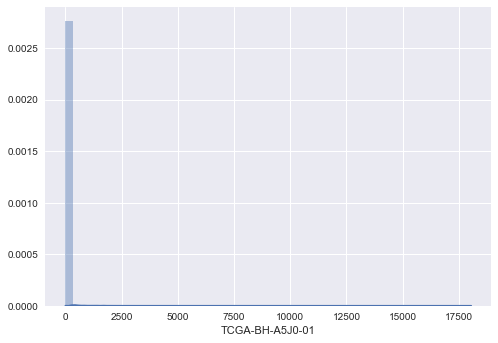

In [27]:
# matrix.iloc[:, 0].hist(bins=100, log=True);
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

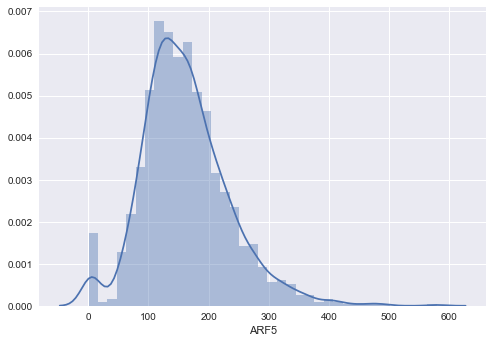

In [28]:
# matrix.iloc[0, :].hist(bins=100);
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_brca_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-BH-A5J0-01,TCGA-AR-A5QM-01,TCGA-E9-A5FL-01,TCGA-E9-A5UP-01,TCGA-E9-A5UO-01,TCGA-AC-A5EH-01,TCGA-AC-A5XU-01,TCGA-AR-A5QN-01,TCGA-AR-A5QQ-01,TCGA-AR-A5QP-01,...,TCGA-Z7-A8R6-01,TCGA-WT-AB41-01,TCGA-3C-AALI-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-OL-A6VQ-01,TCGA-E9-A54Y-01,TCGA-BH-A0H9-11
A1BG,0.301194,0.301194,0.301194,0.058617,0.029725,0.301194,0.597619,0.301194,0.301194,0.029565,...,0.301194,0.301194,0.052555,0.000559,0.301194,0.042541,0.301194,0.301194,0.016501,0.301194
A1CF,0.002464,0.027845,0.002285,0.017410,0.012141,0.015338,0.010110,0.020293,0.002470,0.012981,...,0.022898,0.027693,0.084300,0.002092,0.121078,0.252808,0.212573,0.016633,0.001975,0.010896
A2M,140.792000,202.147000,28.482000,28.638400,70.809400,103.425000,165.884000,176.234000,60.576800,120.436000,...,98.618300,54.741400,96.803300,2.176030,21.568300,55.681800,28.734800,272.401000,5.266820,455.496000
A2ML1,0.025565,0.185687,2.549320,0.111167,0.104938,0.109653,0.089618,0.163914,9.531200,0.201557,...,0.126280,0.058378,0.212008,0.015490,0.819545,1.343810,1.105130,0.063728,0.033642,0.049379
A3GALT2,0.021295,0.076203,0.065057,0.065057,0.065057,0.065057,0.065057,0.039273,0.065057,0.068326,...,0.086203,0.065057,0.030310,0.065057,0.065057,0.091778,0.071136,0.065057,0.065057,0.065057


In [34]:
normalized_matrix.shape

(19029, 1256)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-BH-A5J0-01,TCGA-AR-A5QM-01,TCGA-E9-A5FL-01,TCGA-E9-A5UP-01,TCGA-E9-A5UO-01,TCGA-AC-A5EH-01,TCGA-AC-A5XU-01,TCGA-AR-A5QN-01,TCGA-AR-A5QQ-01,TCGA-AR-A5QP-01,...,TCGA-Z7-A8R6-01,TCGA-WT-AB41-01,TCGA-3C-AALI-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-OL-A6VQ-01,TCGA-E9-A54Y-01,TCGA-BH-A0H9-11
A1BG,-0.326321,-0.305048,-0.337111,-1.047690,-1.337798,-0.332467,0.000785,-0.329710,-0.303540,-1.314951,...,-0.328081,-0.279590,-1.044756,-1.405134,0.336526,-0.682328,0.378694,-0.319441,-1.577156,-0.358105
A1CF,-2.413452,-1.339143,-2.457144,-1.574913,-1.726655,-1.625535,-1.770879,-1.501217,-2.389725,-1.672429,...,-1.447131,-1.316059,-0.839543,-0.831992,-0.059254,0.091659,0.227356,-1.577311,-2.499120,-1.799684
A2M,2.343412,2.521774,1.638614,1.641237,2.039171,2.203313,2.444166,2.437535,1.999921,2.295032,...,2.187031,1.979880,2.220521,2.185195,2.191496,2.434582,2.358256,2.636922,0.926879,2.821534
A2ML1,-1.397527,-0.515112,0.590468,-0.769736,-0.789988,-0.771292,-0.823242,-0.593939,1.196762,-0.481326,...,-0.705592,-0.992184,-0.439017,0.037573,0.771253,0.817206,0.943261,-0.993958,-1.267785,-1.143405
A3GALT2,-1.476899,-0.901920,-1.002665,-1.002420,-0.997629,-0.998021,-0.962348,-1.214461,-0.969094,-0.951140,...,-0.871402,-0.945144,-1.283790,0.660821,-0.329028,-0.348390,-0.248062,-0.984996,-0.981378,-1.023659


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-BH-A5J0-01,TCGA-AR-A5QM-01,TCGA-E9-A5FL-01,TCGA-E9-A5UP-01,TCGA-E9-A5UO-01,TCGA-AC-A5EH-01,TCGA-AC-A5XU-01,TCGA-AR-A5QN-01,TCGA-AR-A5QQ-01,TCGA-AR-A5QP-01,...,TCGA-Z7-A8R6-01,TCGA-WT-AB41-01,TCGA-3C-AALI-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-OL-A6VQ-01,TCGA-E9-A54Y-01,TCGA-BH-A0H9-11
A1BG,-0.236959,-0.417497,-0.211126,-0.959257,-1.276103,-0.318284,-0.034519,-0.400104,-0.204109,-1.382635,...,-0.215093,-0.089028,-1.160215,-1.571084,-0.254674,-1.400130,-0.321239,-0.490919,-1.334693,-0.149257
A1CF,-3.371576,-1.427872,-3.026708,-1.502025,-1.650882,-1.616575,-1.760403,-1.508223,-2.986605,-1.744039,...,-1.373970,-1.270497,-0.960095,-1.030342,-0.757587,-0.660507,-0.502094,-1.893968,-2.405192,-1.752692
A2M,2.301367,2.474320,1.797101,1.615755,1.986275,2.139769,2.425426,2.394945,1.974118,2.273398,...,2.141184,2.023138,2.154343,2.125676,2.307804,2.467811,2.387909,2.579950,1.284653,2.777396
A2ML1,-1.346299,-0.618017,0.889644,-0.658381,-0.701593,-0.754904,-0.825736,-0.639430,1.269241,-0.561435,...,-0.619896,-0.943399,-0.565156,-0.245299,0.445263,0.281776,0.512432,-1.194877,-1.045423,-1.055032
A3GALT2,-1.429611,-0.983891,-0.967480,-0.902985,-0.915212,-0.983605,-0.958421,-1.226516,-0.914369,-1.008826,...,-0.793987,-0.887795,-1.413841,0.526136,-1.041482,-1.070668,-0.957588,-1.181834,-0.712500,-0.914369


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-BH-A5J0-01,TCGA-AR-A5QM-01,TCGA-E9-A5FL-01,TCGA-E9-A5UP-01,TCGA-E9-A5UO-01,TCGA-AC-A5EH-01,TCGA-AC-A5XU-01,TCGA-AR-A5QN-01,TCGA-AR-A5QQ-01,TCGA-AR-A5QP-01,...,TCGA-Z7-A8R6-01,TCGA-WT-AB41-01,TCGA-3C-AALI-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-A7-A0DC-01,TCGA-OL-A6VQ-01,TCGA-E9-A54Y-01,TCGA-BH-A0H9-11
A1BG,0.604139,-0.297648,0.733174,-3.003724,-4.586364,0.197918,1.615320,-0.210767,0.768223,-5.118490,...,0.713356,1.343050,-4.007507,-6.059788,0.515649,-5.205877,0.183159,-0.664385,-4.879020,1.042205
A1CF,-5.512605,0.313147,-4.478952,0.090891,-0.355267,-0.252443,-0.683529,0.072317,-4.358753,-0.634483,...,0.474703,0.784837,1.715187,1.504640,2.322153,2.613124,3.087926,-1.083855,-2.616119,-0.660419
A2M,-0.231582,0.299489,-1.779988,-2.336832,-1.199107,-0.727786,0.149356,0.055760,-1.236439,-0.317464,...,-0.723442,-1.085916,-0.683037,-0.771062,-0.211818,0.279503,0.034154,0.623838,-3.353518,1.230118
A2ML1,-1.804044,-0.044831,3.597017,-0.142333,-0.246714,-0.375492,-0.546591,-0.096558,4.513958,0.091845,...,-0.049371,-0.830813,0.082856,0.855490,2.523587,2.128673,2.685838,-1.438273,-1.077258,-1.100470
A3GALT2,-2.336680,0.134171,0.225142,0.582673,0.514893,0.135755,0.275361,-1.210822,0.519564,-0.004058,...,1.186905,0.666877,-2.249260,8.505009,-0.185090,-0.346877,0.279978,-0.963127,1.638627,0.519564


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19029, 1215)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18601, 1215)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18511, 1215)

# Histogram of First Sample

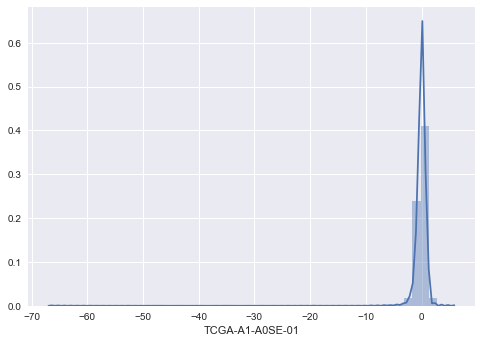

In [50]:
# normalized_matrix.iloc[:, 0].hist(bins=100, log=True);
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

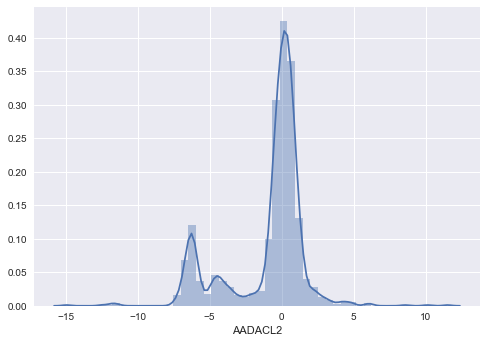

In [51]:
# normalized_matrix.iloc[1, :].hist(bins=50);
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_brca_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18511, 2)

# Save Gene List

In [56]:
filename = path+'tcga_brca_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [62]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        if  '01' in str(index.split('-')[3]):
            sampleType = 'Primary Solid Tumor'
        elif '11' in str(index.split('-')[3]):
            sampleType= 'Solid Tissue Normal'
        metaData.loc[index, 'Sample Type'] = sampleType
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        if  '01' in str(index.split('-')[3]):
            sampleType = 'Primary Solid Tumor'
        elif '11' in str(index.split('-')[3]):
            sampleType= 'Solid Tissue Normal'
        metaData.loc[index, 'Sample Type'] = sampleType
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [63]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [64]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-3C-AAAU-01,55,FEMALE,MX,NX,TX,Stage X,Infiltrating Lobular Carcinoma,Primary Solid Tumor,Breast,NaN
TCGA-3C-AALI-01,50,FEMALE,M0,N1a,T2,Stage IIB,Infiltrating Ductal Carcinoma,Primary Solid Tumor,Breast,NaN
TCGA-3C-AALJ-01,62,FEMALE,M0,N1a,T2,Stage IIB,Infiltrating Ductal Carcinoma,Primary Solid Tumor,Breast,NaN
TCGA-3C-AALK-01,52,FEMALE,M0,N0 (i+),T1c,Stage IA,Infiltrating Ductal Carcinoma,Primary Solid Tumor,Breast,NaN
TCGA-4H-AAAK-01,50,FEMALE,M0,N2a,T2,Stage IIIA,Infiltrating Lobular Carcinoma,Primary Solid Tumor,Breast,NaN


In [65]:
attribute_list.shape

(1215, 10)

# Save Attribute List

In [66]:
filename = path+'tcga_brca_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [67]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [68]:
standard_matrix.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.687228,-0.585137,0.023659,0.082962,-0.716766,-0.121172,-0.172146,-0.529211,-0.772717,-0.970111,...,0.833875,0.957532,0.960826,-0.506181,0.929519,0.947640,-0.736504,-0.511120,0.570270,0.674051
A1CF,-0.150944,0.930976,-0.118063,0.064642,-0.327054,0.370816,-0.266156,0.986957,-0.170701,0.191384,...,0.863364,0.593109,-0.503084,-0.674182,0.660684,-0.460329,-0.241487,0.899648,0.494294,0.438305
A2M,-0.575447,-0.526111,-0.343479,-0.123001,-0.126277,0.092635,0.216083,-0.953876,0.851806,0.663988,...,-0.907826,-0.957170,-0.888080,0.487710,-0.756427,-0.891370,0.629392,0.443275,0.570087,-0.555708
A2ML1,0.289372,0.101742,0.391466,-0.640383,-0.446233,-0.961199,-0.344236,-0.571279,0.103387,-0.217527,...,0.715945,-0.877326,0.318997,-0.089168,-0.729230,-0.321200,-0.401809,0.528150,-0.747332,-0.034887
A3GALT2,0.025199,-0.665879,-0.502991,-0.417396,0.846945,-0.215059,-0.246330,0.244151,0.860163,0.054832,...,-0.841933,0.641001,0.758002,-0.767876,0.634414,0.092725,-0.254553,0.764577,0.448302,0.843655


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

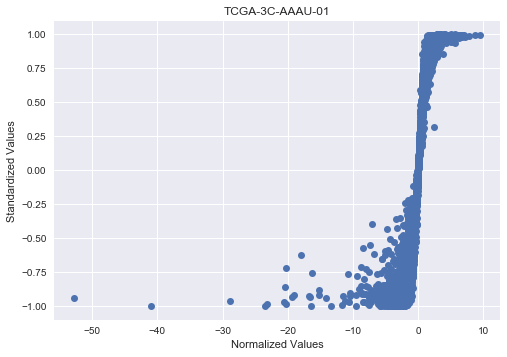

In [69]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [70]:
filename = path+'tcga_brca_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [71]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [72]:
tertiary_matrix.head()

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,-1,...,0,1,1,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,-1,0,0,...,0,-1,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [73]:
filename = path+'tcga_brca_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [74]:
name = 'tcga_brca_gene_up_set'

In [75]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [76]:
name = 'tcga_brca_gene_down_set'

In [77]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [78]:
name = 'tcga_brca_attribute_up_set'

In [79]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [80]:
name = 'tcga_brca_attribute_down_set'

In [81]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [82]:
attribute_normalized_matrix = normalized_matrix.copy()

In [83]:
getSampleData(attribute_normalized_matrix, sample_meta)

In [84]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [85]:
attribute_similarity_matix.head()

,"(Donor:TCGA-3C-AAAU, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage X, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-3C-AALI, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-3C-AALJ, Age:62.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-3C-AALK, Age:52.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-4H-AAAK, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-5L-AAT0, Age:42.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-5L-AAT1, Age:63.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-5T-A9QA, Age:52.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Other, specify, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-A1-A0SB, Age:70.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Other, specify, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-A1-A0SD, Age:59.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)",...,"(Donor:TCGA-UL-AAZ6, Age:73.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-UU-A93S, Age:63.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-V7-A7HQ, Age:75.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-W8-A86G, Age:66.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-WT-AB41, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-WT-AB44, Age:77.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-XX-A899, Age:46.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-XX-A89A, Age:68.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-Z7-A8R5, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-Z7-A8R6, Age:46.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-3C-AAAU, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage X, Histology:Infiltrating Lobular Carcinoma, Tissue:Breast, Tumor:nan, Gradenan)",1.000000,0.140780,0.126750,0.078464,0.084403,0.038106,0.036493,0.121379,0.033617,0.062324,...,0.099681,0.040381,0.028164,0.112572,0.019203,-0.060712,0.117374,0.037647,0.019083,0.130312
"(Donor:TCGA-3C-AALI, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Infiltrating Ductal Carcinoma, Tissue:Breast, Tumor:nan

# Save Attribute Similarity Matrix

In [86]:
filename = path+'tcga_brca_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [93]:
# net.load_df(attribute_similarity_matix.iloc[0:400,0:400].copy())
# # net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

# Create Gene Similarity Matrix

In [94]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [95]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.006566,-0.087608,-0.029110,0.128136,0.025628,0.077297,-0.056064,-0.019190,0.073909,...,0.085164,0.157677,-0.000621,-0.040543,0.023393,0.091323,-0.020520,-0.044340,-0.129551,-0.016818
A1CF,0.006566,1.000000,-0.021898,-0.047052,0.042890,-0.179568,0.066335,-0.088049,0.007968,-0.023915,...,0.076661,0.000115,0.256670,0.137667,0.030089,0.130217,0.182300,-0.100775,0.164594,0.227208
A2M,-0.087608,-0.021898,1.000000,-0.008459,-0.110134,0.138859,0.063628,-0.284779,0.018463,0.016681,...,-0.280007,-0.476418,0.064302,-0.107734,-0.204349,-0.255180,0.289391,0.480147,0.227603,0.251308
A2ML1,-0.029110,-0.047052,-0.008459,1.000000,0.060549,-0.069848,-0.070805,-0.321374,-0.069850,-0.063452,...,0.257542,0.142473,-0.209957,-0.236630,0.189702,0.216937,0.027031,0.077711,-0.093618,0.032398
A3GALT2,0.128136,0.042890,-0.110134,0.060549,1.000000,-0.031228,0.077750,-0.051280,-0.082646,-0.023098,...,0.100165,0.126543,-0.000680,-0.032409,0.059331,0.117736,-0.013165,-0.031789,-0.096698,-0.014634


# Save Gene Similarity Matrix

In [96]:
filename = path+'tcga_brca_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [97]:
name = 'tcga_brca_gene_attribute_edge_list'

In [98]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  1215 Out of 1215   

 The number of statisticaly relevent gene-attribute associations is: 1124480
